In [126]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [127]:
import pandas as pd
df = pd.read_csv (r"milknew.csv")

In [128]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [132]:
df.Delay =df.Taste.replace({1:"Yes",0:"No"})

#### 2.2. Data Manipulation


In [134]:
df.Taste.value_counts()

1    579
0    480
Name: Taste, dtype: int64

# 3. Missing Value Identify & Treatment

In [135]:
print(df.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


# 4.Outlier identify & Treatment 

In [136]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

<AxesSubplot:>

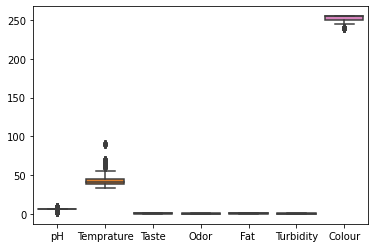

In [137]:
import seaborn as sns
sns.boxplot(data=df)


<AxesSubplot:ylabel='pH'>

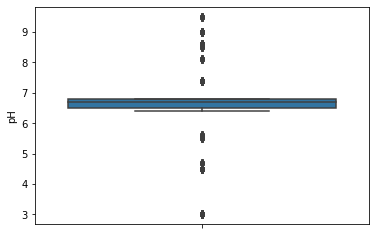

In [138]:
sns.boxplot(y=df.pH)  # Single Variable

<AxesSubplot:ylabel='pH'>

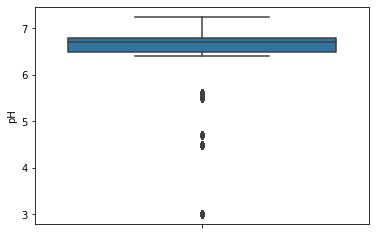

In [140]:
q1 = df['pH'].quantile(0.25)
q3 = df['pH'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['pH']=np.where(df['pH'] > upper_limit,upper_limit,df['pH']) 
sns.boxplot(y='pH',data=df)  # Single Variable

<AxesSubplot:ylabel='pH'>

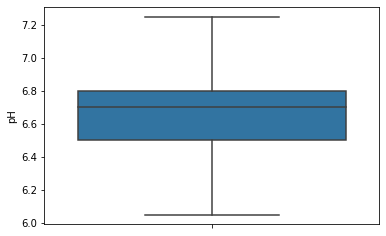

In [141]:
q1 = df['pH'].quantile(0.25)
q3 = df['pH'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
df['pH']=np.where(df['pH'] < lower_limit,lower_limit,df['pH']) 
sns.boxplot(y='pH',data=df)  # Single Variable

<AxesSubplot:ylabel='Temprature'>

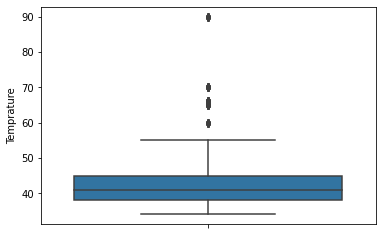

In [142]:
sns.boxplot(y=df.Temprature)  # Single Variable

<AxesSubplot:ylabel='Temprature'>

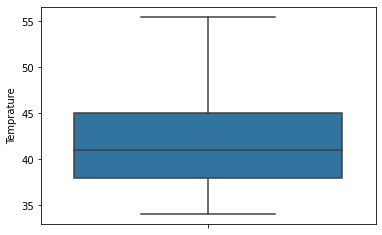

In [143]:
q1 = df['Temprature'].quantile(0.25)
q3 = df['Temprature'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['Temprature']=np.where(df['Temprature'] > upper_limit,upper_limit,df['Temprature']) 
sns.boxplot(y='Temprature',data=df)  # Single Variable

<AxesSubplot:ylabel='Colour'>

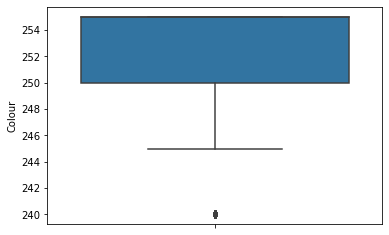

In [144]:
sns.boxplot(y=df.Colour)  # Single Variable

<AxesSubplot:ylabel='Colour'>

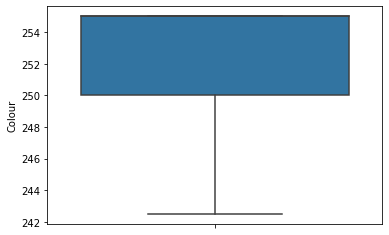

In [145]:
q1 = df['Colour'].quantile(0.25)
q3 = df['Colour'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
df['Colour']=np.where(df['Colour'] < lower_limit,lower_limit,df['Colour']) 
sns.boxplot(y='Colour',data=df)  # Single Variable

<AxesSubplot:>

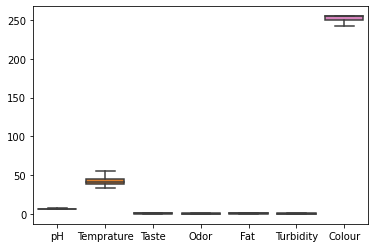

In [146]:
import seaborn as sns
sns.boxplot(data=df)


# Data Visualization

In [147]:
import plotly.express as px

fig = px.pie(df,names='Taste',color='Taste',
             color_discrete_map={1:'red',
                                 0:'green'})
fig.show()

# 5.Labeling the data 


In [148]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.60,35.0,1,0,1,0,254.0,high
1,6.60,36.0,0,1,0,1,253.0,high
2,7.25,55.5,1,1,1,1,246.0,low
3,7.25,34.0,1,1,0,1,255.0,low
4,6.60,37.0,0,0,0,0,255.0,medium


In [149]:
df.select_dtypes(include=[np.number]).columns.tolist()

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

In [150]:
df_num = df[df.select_dtypes(include=[np.number]).columns.tolist()]
df_num.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.60,35.0,1,0,1,0,254.0
1,6.60,36.0,0,1,0,1,253.0
2,7.25,55.5,1,1,1,1,246.0


In [151]:
df_dummies = df[df.select_dtypes(include=['object']).columns.tolist()]
df_dummies.head(3)

,Grade
0,high
1,high
2,low


In [152]:
from sklearn.preprocessing import LabelEncoder
df_dummies=df_dummies.apply(LabelEncoder().fit_transform)
df_dummies.head(3)
# label in ascending order

,Grade
0,0
1,0
2,1


In [153]:
df = pd.concat([df_num, df_dummies],axis=1)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.60,35.0,1,0,1,0,254.0,0
1,6.60,36.0,0,1,0,1,253.0,0
2,7.25,55.5,1,1,1,1,246.0,1
3,7.25,34.0,1,1,0,1,255.0,1
4,6.60,37.0,0,0,0,0,255.0,2


# Data Partition 

In [154]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df.drop('Taste', axis = 1)
Y = df[['Taste']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

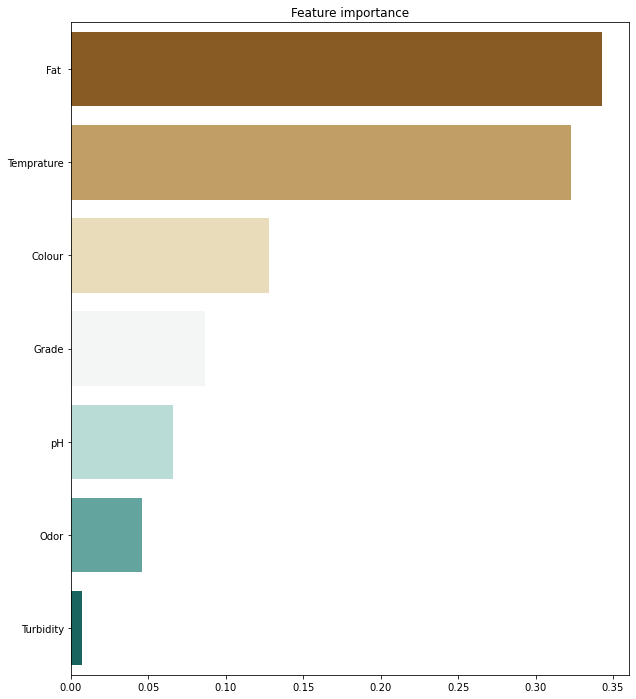

In [156]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [157]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [111]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


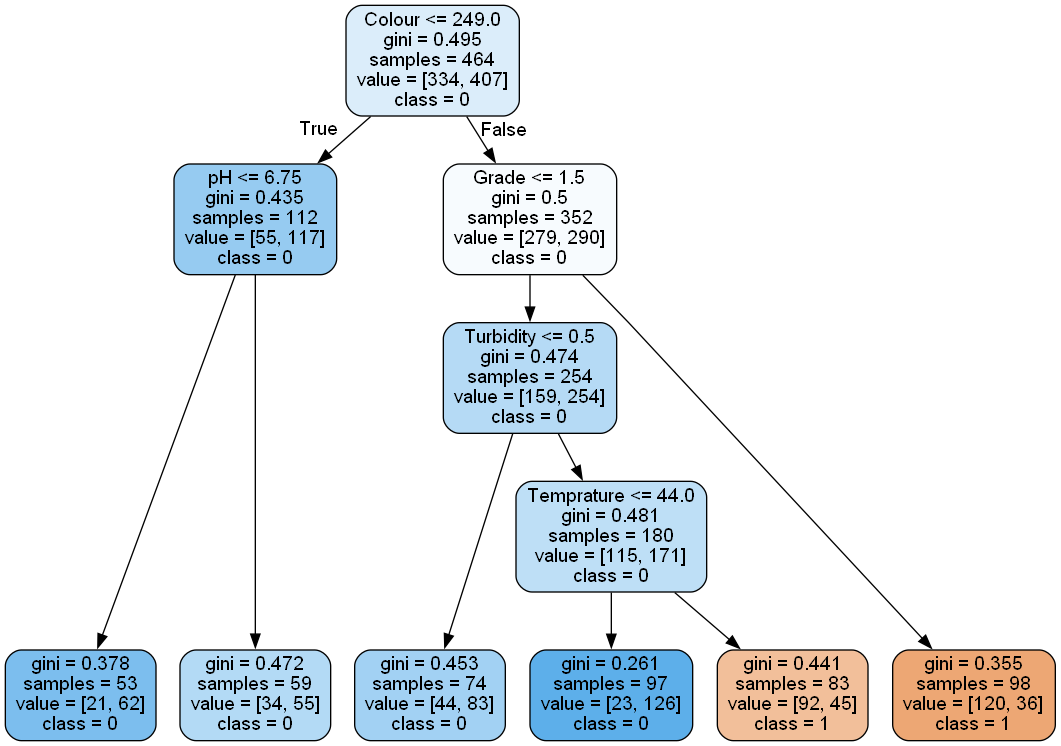

In [158]:
tree = Model.estimators_[1]  # specify the tree number   
Taste=['1','0'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Taste,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [159]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade,Taste
270,7.25,55.5,0,0,0,246.0,1,0
582,6.80,41.0,0,1,0,255.0,2,0
154,6.60,37.0,1,1,1,255.0,0,1
126,7.25,55.5,0,0,0,246.0,1,0
824,6.80,45.0,0,0,1,255.0,2,0


In [160]:
train['Predicted']=Model.predict(X_train)
train.head()

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade,Taste,Predicted
270,7.25,55.5,0,0,0,246.0,1,0,0
582,6.80,41.0,0,1,0,255.0,2,0,1
154,6.60,37.0,1,1,1,255.0,0,1,1
126,7.25,55.5,0,0,0,246.0,1,0,0
824,6.80,45.0,0,0,1,255.0,2,0,0


# Step 7 : Model Performance Metrics

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Taste'], train['Predicted'])
print(confusion_matrix)

[[266  71]
 [ 97 307]]


In [162]:
Accuracy_Train=((266+307)/(741)*100)
print(Accuracy_Train)

77.32793522267207


In [163]:
from sklearn.metrics import classification_report
print(classification_report(train['Taste'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       337
           1       0.81      0.76      0.79       404

    accuracy                           0.77       741
   macro avg       0.77      0.77      0.77       741
weighted avg       0.78      0.77      0.77       741



# Step 8 : Predictions on Test Dataset


In [164]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade,Taste
828,6.05,40.0,1,1,1,255.0,1,1
893,7.25,55.5,0,0,0,255.0,1,0
205,6.60,37.0,1,1,1,255.0,0,1
485,6.60,38.0,0,1,0,255.0,2,0
962,6.50,38.0,0,1,0,255.0,2,1


In [165]:
test['Predicted']=Model.predict(X_test)
test.head()

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade,Taste,Predicted
828,6.05,40.0,1,1,1,255.0,1,1,1
893,7.25,55.5,0,0,0,255.0,1,0,0
205,6.60,37.0,1,1,1,255.0,0,1,1
485,6.60,38.0,0,1,0,255.0,2,0,1
962,6.50,38.0,0,1,0,255.0,2,1,1


# Step 9 : Model Performance Metrics on Test data 

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Taste'])
print(confusion_matrix)

[[114  35]
 [ 29 140]]


In [167]:
Accuracy_test=((114+140)/(318)*100)
Accuracy_test

79.87421383647799

In [168]:
from sklearn.metrics import classification_report
print(classification_report(test['Taste'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       143
           1       0.83      0.80      0.81       175

    accuracy                           0.80       318
   macro avg       0.80      0.80      0.80       318
weighted avg       0.80      0.80      0.80       318



# Finish